In [1]:
import os
import json, codecs
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
import operator
from pytagcloud import make_tags, create_tag_image
from unicodedata import normalize
from collections import Counter

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
os.getcwd()

'/home/rajan/Downloads'

In [3]:
df = pd.read_csv('/home/rajan/Lab/Untitled Folder/train.csv', encoding="cp1252")

In [4]:
df.head()

,Unnamed: 0,title,author,date,read_time,shares,content,category
0,6789,The Unintended Consequences of Leaving Healthc...,Ed Dolan,Aug 27,5.0,128.0,With the failure of repeal and replace at the ...,2
1,7886,"Wyatt Lindquist: Frisbee Enthusiast, Entrepreneur",The Edge of Adulthood,Sep 27,3.0,148.0,Illustration: Shannon WrightIllustration: Shan...,1
2,4488,"Peter Viertel - Novelist, Screenwriter, with D...",Steve Newman Writer,Jun 16,4.0,118.0,"Peter Viertel’s 1992 memoir, Dangerous Friends...",0
3,8298,Why I chose customer-funded growth over taking...,Aytekin Tank,Aug 7,6.0,3500.0,It’s the first page in a familiar story. A col...,1
4,8343,How The Best Leaders Get Truly Honest Feedback...,Robert Glazer,Aug 3,4.0,42.0,The purpose of giving feedback to someone is t...,1


In [4]:
count_row = df.shape[0] 
count_row

8634

In [8]:
df['tokens'] = df['content'].dropna().apply(word_tokenize)

In [9]:
df.tokens[1:1000]

1      [Illustration, :, Shannon, WrightIllustration,...
2      [Peter, Viertel, ’, s, 1992, memoir, ,, Danger...
3      [It, ’, s, the, first, page, in, a, familiar, ...
4      [The, purpose, of, giving, feedback, to, someo...
5                                                    NaN
6      [Trust, or, Distrust, Drives, Social, GroupsRa...
7      [Credit, :, tangi, bertin, via, flickr/CC, BY,...
8      [People, point, to, two, main, risks, when, co...
9      [That, ’, s, it, ., The, Kevin, Roose, article...
10     [By, Shannon, StironeRunning, low, on, fuel, ,...
11     [Smartphones, are, one, of, the, most, amazing...
12     [By, Leonid, BershidskyFacebook, ’, s, widely,...
13     [I, was, recently, asked, ,, “, what, should, ...
14     [By, Lara, SeligmanPeople, who, form, their, i...
15     [With, more, and, more, companies, jumping, on...
16     [Last, week, ,, BlackBerry, announced, that, J...
17     [Early, March, was, filled, with, headlines, l...
18     [Over, the, last, few, y

In [10]:
df['ntokens'] = df['tokens'].dropna().apply(lambda x: ', '.join(map(str, x)))

In [11]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
df['tokens_nop'] = df['ntokens'].dropna().apply(remove_punctuations)

In [13]:
df.head()

,Unnamed: 0,title,author,date,read_time,shares,content,category,tokens,ntokens,tokens_nop
0,6789,The Unintended Consequences of Leaving Healthc...,Ed Dolan,Aug 27,5.0,128.0,With the failure of repeal and replace at the ...,2,"[With, the, failure, of, repeal, and, replace,...","With, the, failure, of, repeal, and, replace, ...",With the failure of repeal and replace at the ...
1,7886,"Wyatt Lindquist: Frisbee Enthusiast, Entrepreneur",The Edge of Adulthood,Sep 27,3.0,148.0,Illustration: Shannon WrightIllustration: Shan...,1,"[Illustration, :, Shannon, WrightIllustration,...","Illustration, :, Shannon, WrightIllustration, ...",Illustration Shannon WrightIllustration Shan...
2,4488,"Peter Viertel - Novelist, Screenwriter, with D...",Steve Newman Writer,Jun 16,4.0,118.0,"Peter Viertel’s 1992 memoir, Dangerous Friends...",0,"[Peter, Viertel, ’, s, 1992, memoir, ,, Danger...","Peter, Viertel, ’, s, 1992, memoir, ,, Dangero...",Peter Viertel ’ s 1992 memoir Dangerous Frien...
3,8298,Why I chose customer-funded growth over taking...,Aytekin Tank,Aug 7,6.0,3500.0,It’s the first page in a familiar story. A col...,1,"[It, ’, s, the, first, page, in, a, familiar, ...","It, ’, s, the, first, page, in, a, familiar, s...",It ’ s the first page in a familiar story A c...
4,8343,How The Best Leaders Get Truly Honest Feedback...,Robert Glazer,Aug 3,4.0,42.0,The purpose of giving feedback to someone is t...,1,"[The, purpose, of, giving, feedback, to, someo...","The, purpose, of, giving, feedback, to, someon...",The purpose of giving feedback to someone is t...


In [14]:
df['tokens_lower'] = df.tokens_nop.dropna().str.lower() 

In [15]:
stop = stopwords.words('english')+['one','even','time','year','years','ways','way','things','thing']

In [16]:
df['tokens_nostop'] = df['tokens_lower'].dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 

In [17]:
import nltk
def get_noun(text):
    words=nltk.word_tokenize(text)
    pos_tags =nltk.pos_tag(words)
    ret = []
    for word,pos in pos_tags:
            if (pos == 'NN'or pos =='VB'):
                ret.append(word)
    return ' '.join(ret)

In [18]:
snowball = nltk.SnowballStemmer('english')
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [snowball.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [19]:
df['tokens_snow'] = df['tokens_nostop'].dropna().apply(stem_sentences)

In [20]:
wnl = nltk.WordNetLemmatizer()
def lemma_text(sentence):
    tokens = sentence.split()
    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [21]:
df['tokens_lemmatized'] = df['tokens_nostop'].dropna().apply(lemma_text)

In [22]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

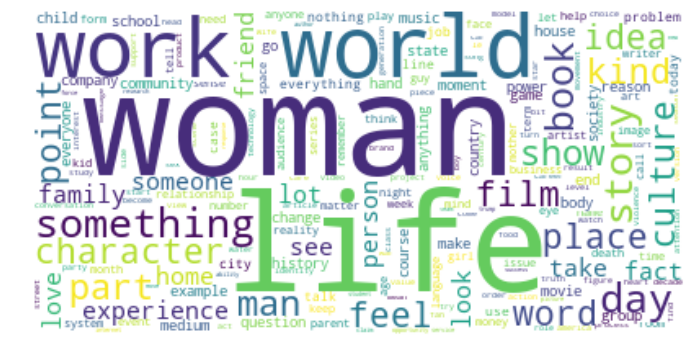

In [117]:
culture_text= df[(df['category']==0) & (df['tokens_lemmatized'])]
culture_text= culture_text['tokens_lemmatized'].apply(get_noun).str.cat(sep=' ')
wc = WordCloud(background_color="white").generate(culture_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

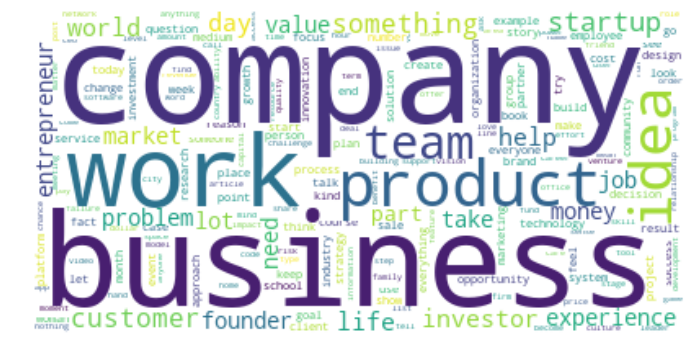

In [118]:
entre_text= df[(df['category']==1) & (df['tokens_lemmatized'])]
entre_text= entre_text['tokens_lemmatized'].apply(get_noun).str.cat(sep=' ')
wc = WordCloud(background_color="white").generate(entre_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

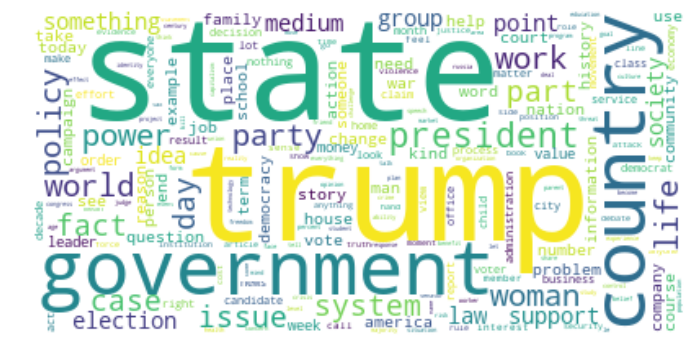

In [119]:
politics_text= df[(df['category']==2) & (df['tokens_lemmatized'])]
politics_text= politics_text['tokens_lemmatized'].apply(get_noun).str.cat(sep=' ')
wc = WordCloud(background_color="white").generate(politics_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

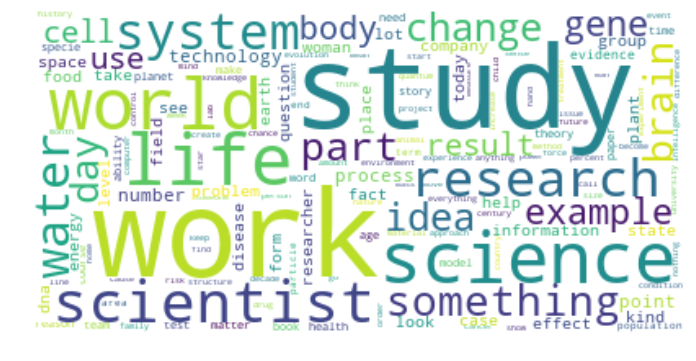

In [120]:
science_text= df[(df['category']==3) & (df['tokens_lemmatized'])]
science_text= science_text['tokens_lemmatized'].apply(get_noun).str.cat(sep=' ')
wc = WordCloud(background_color="white").generate(science_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

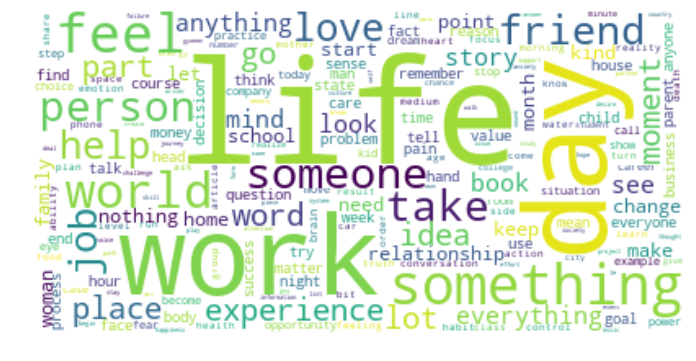

In [121]:
self_text= df[(df['category']==4) & (df['tokens_lemmatized'])]
self_text= self_text['tokens_lemmatized'].apply(get_noun).str.cat(sep=' ')
wc = WordCloud(background_color="white").generate(self_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

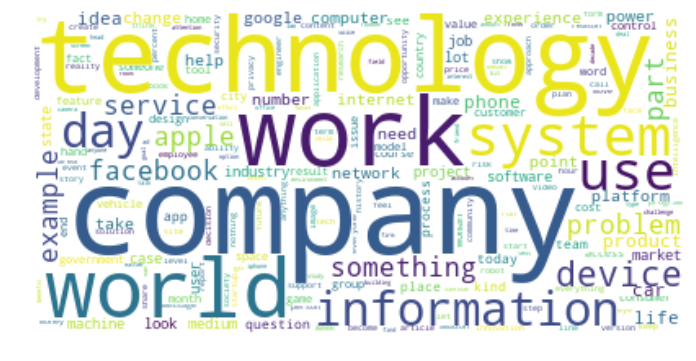

In [122]:
tech_text= df[(df['category']==5) & (df['tokens_lemmatized'])]
tech_text= tech_text['tokens_lemmatized'].apply(get_noun).str.cat(sep=' ')
wc = WordCloud(background_color="white").generate(tech_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()